In [2]:
import os
import tensorflow as tf
import shutil
import numpy as np 

from os import getcwd
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [3]:
folder = 'PKLot/PKLotSegmented/PUC/Cloud/'
classes = ['Empty', 'Occupied']

val_ratio = 0.25
test_ratio = 0.05

for kelas in classes:
    #os.makedirs('/train/' + kelas)
    #os.makedirs('/test/' + kelas)
    #os.makedirs('/val/'+ kelas)
    source = folder + kelas

    fileName = os.listdir(source)
    np.random.shuffle(fileName)
    name_train, name_val = np.split(np.array(fileName),[int(len(fileName) * (1 - val_ratio))])

    name_train = [source + '/' + name for name in name_train.tolist()]
    name_val =  [source + '/' + name for name in name_val.tolist()]

    for name in name_train:
        shutil.copy(name,  '/train/'+ kelas)
    #for name in name_test:
        #shutil.copy(name, getcwd + '/test/' + kelas)
    for name in name_val:
        shutil.copy(name, '/val/' + kelas)

    print('image', len(fileName))
    print('image train', len(name_train))
    print('Image validation', len(name_val))

image 90417
image train 67812
Image validation 22605
image 42363
image train 31772
Image validation 10591


In [5]:
train_dir = '/train/'
val_dir= '/val/'
batch_size = 32

In [13]:
train_data = ImageDataGenerator(
    rescale = 1/255.0,
    shear_range = 0.1,
    horizontal_flip= True,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1)

val_data = ImageDataGenerator(
    rescale = 1/255.0
)

train_generator = train_data.flow_from_directory(
    train_dir,
    batch_size=batch_size,
    target_size=(150, 150),
    class_mode='categorical'
)

val_generator = val_data.flow_from_directory(
    val_dir,
    batch_size=batch_size,
    target_size=(150, 150),
    class_mode='categorical'
)


Found 89959 images belonging to 5 classes.
Found 52321 images belonging to 5 classes.


In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [15]:
filePath = "parking.h5"

callback= tf.keras.callbacks.ModelCheckpoint(filepath=filePath, monitor='accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq=1)

early = tf.keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=0, patience=10, verbose=1, mode='auto')


In [16]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [12]:
history = model.fit(
    train_generator,
    validation_data= val_generator,
    steps_per_epoch=50,
    epochs=5,
    verbose=1,
    callbacks=[callback, early])


Epoch 1/5


InvalidArgumentError:  Input to reshape is a tensor with 2048 values, but the requested shape requires a multiple of 3136
	 [[node sequential/flatten/Reshape (defined at <ipython-input-12-0b97307126f1>:1) ]] [Op:__inference_train_function_1444]

Function call stack:
train_function


<Figure size 432x288 with 0 Axes>

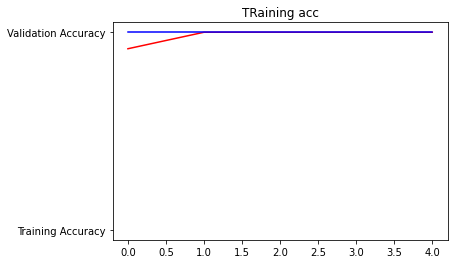

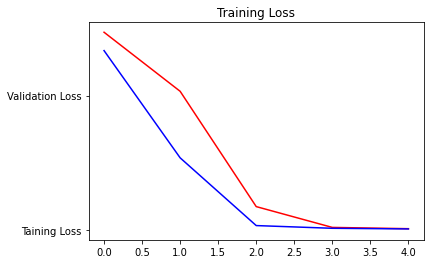

<Figure size 432x288 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epoch = range(len(acc))

plt.plot(epoch, acc, 'r', "Training Accuracy")
plt.plot(epoch, val_acc, 'b', "Val Accuracy")
plt.title('Training acc')
plt.figure()

plt.plot(epoch, loss, 'r', 'Training Loss')
plt.plot(epoch, val_loss, 'b', 'Val Loss')
plt.title('Training Loss')
plt.figure()

